<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Linear-interpolation" data-toc-modified-id="Linear-interpolation-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Linear interpolation</a></span></li><li><span><a href="#Higher-order-lagrange-interpolation" data-toc-modified-id="Higher-order-lagrange-interpolation-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Higher order lagrange interpolation</a></span><ul class="toc-item"><li><span><a href="#Error" data-toc-modified-id="Error-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Error</a></span><ul class="toc-item"><li><span><a href="#Interpolating-error" data-toc-modified-id="Interpolating-error-2.1.1"><span class="toc-item-num">2.1.1&nbsp;&nbsp;</span>Interpolating error</a></span></li><li><span><a href="#Uncertainty" data-toc-modified-id="Uncertainty-2.1.2"><span class="toc-item-num">2.1.2&nbsp;&nbsp;</span>Uncertainty</a></span></li></ul></li></ul></li><li><span><a href="#Cubic-Splines" data-toc-modified-id="Cubic-Splines-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Cubic Splines</a></span></li><li><span><a href="#Exercises" data-toc-modified-id="Exercises-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Exercises</a></span></li></ul></div>

In [1]:
from matplotlib import pyplot as plt
# import seaborn as sns
import numpy as np
import ipywidgets as widgets
from ipywidgets import interact, interact_manual
import seaborn as sns

import math
import sympy as sym
sns.set_theme()
%matplotlib inline

# Linear interpolation
Using:

$$ L(x) = \frac{ x - b}{ a - b} f(a) + \frac{ x - a}{ b- a} f(b) $$

With error:

$$ | f(x) - L(x) | \le \frac{1}{8} (b-a)^2 max_{t \in [a,b]}( f''(t) )$$

With uncertainty:
$$
| L(x) - \hat{L}(x) | \le \frac{ |b -x | + |a - x|}{b -a} \epsilon
$$
with $\epsilon$ being the largest uncertainty over all datapoints.

In [2]:
t = np.arange(0., 10.2, 0.2)

def f(x):
    return x**2

@interact
def show_articles_more_than(a=(1,3), b = (7,10), eps1= (0,10), eps2 =(0,10)):
    max_interpolation_error = 1/8 * (b-a)**2 * 2
    def L(x):
        '''Lagrange polynomial linear'''
        return ((x-b)/(a -b)) * f(a) + ((x-a)/(b-a))*f(b) 
    def unError(x):
        return (abs(b-x)+ abs(a-x))/(b-a) * max(eps1,eps2)
    def unErrorOutside(x):
        return abs((1 + 2 *( (x-b)/(b-a) )) * max(eps1,eps2))
    
    
    plt.figure(figsize=(15,8))
    
    plt.plot(t, f(t), label="function")
    plt.errorbar( [a,b],[f(a),f(b)] , yerr =[eps1,eps2], linewidth=0,elinewidth=3, label="Error" )
    plt.plot(t, L(t), label="Lagrange polynomial")
#     plt.plot(t, unErrorOutside(t), label="Uncertainty")

    plt.plot(t, L(t) + unError(t) + max_interpolation_error, label="L hat + e", linestyle='--',color='grey')
    plt.plot(t, L(t) - unError(t) - max_interpolation_error, label="L hat - e", linestyle='--', color='grey')
    
    plt.plot(t, L(t) + max_interpolation_error, label="L hat", linestyle='--',color='black')
    plt.plot(t, L(t) - max_interpolation_error, label="L hat ", linestyle='--', color='black')
    
    plt.xlim([-1,11])
    plt.legend()
    print(f"Max interpolation error less than: {max_interpolation_error}")
    
    
    

interactive(children=(IntSlider(value=2, description='a', max=3, min=1), IntSlider(value=8, description='b', m…

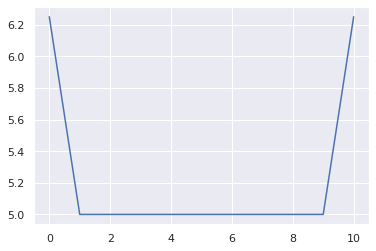

In [3]:
a = 1
b = 9
eps1 = 5
eps2 = 5
def unError(x):
    return (abs(b-x)+ abs(a-x))/(b-a) * max(eps1,eps2)
def unErrorOutside(x):
    return abs((1 + 2 *( (x-b)/(b-a) )) * max(eps1,eps2))
plt.plot(t, unError(t), label="Uncertainty")


# Higher order lagrange interpolation

Note if we have N+1 data points, we fit a Nth order lagrange polynomial.
We construct our lagrange polynomial from basis polynomials, meaning the basis polynomial for point $a$ is zero at all the other nodes and $1$ at $a$. Then summing all basis polynomials yields to correct result.

To construct a basis polynomial (with n data points, index k selects a specifc node):


\begin{equation}
L_{kn}(x) = \prod^n_{i=0} \frac{x - x_i}{x_k - x_i}, \text{ for } i \neq k
\end{equation}

Note that all nodes that are not $x_k$ are roots of this basis polynomial. And pluggin i n $x_k$ yields 1

The full Lagrange interpolating polynomial:
$$
L_n (x) = \sum_{k=0}^n L_{kn}(x) f(x_k)
$$

## Error
### Interpolating error
Note that differentiating the error, $ E(x) = f(x) - L_n $, n+1 times yields $E^{n+1}(x) = f^{n+1}(x) + 0$. To get the error back then, we simply integrate and we make estimations (very similar to derivation of Taylor series error approximation).
Thus:
$$
E(x) = f(x) - L_n(x) \leq \big(\prod_{i=0}^n (x - x_i) \big) \cdot \frac{\max_{t \in [x_0, x_n]} f^{(n+1)}(x)}{(n+1)!}
$$
Note that making this statement independent of $x$ becomes a difficult task, as we would have to find the global maximum of a Nth degree polynomial. (Unlike for the linear Lagrange polynomial).

### Uncertainty
Suppose there exists some uncertainty in our function $f(x)$, then $\hat{f(x)} = f(x) + \epsilon(x)$, where $\hat{f}(x)$ is our observed function. \\

Let us assume $| f(x) - \hat{f}(x) | \le  \epsilon$. Where $\epsilon$ is the greatest error present in our function.\\
then, we ought to introduce error into our Lagrange polynomial as well, namely:

\begin{align*}
	\hat{L_n}(x) = \sum_{k=0}^{n} L_{kn}(x) (f(x) + \epsilon)
.\end{align*}
Then 
\begin{align*}
	|\hat{L_n}(x) - L_n | \le \sum_{k=0}^{n} |L_{kn}(x) | \epsilon
.\end{align*}




In [4]:
t = np.arange(0., 10.2, 0.2)
y = sym.symbols('y')


def f(x):
    return np.sin(x)

@interact
def show_articles_more_than( eps1= (0,2.8)):

    nodes = [0,1,2,3,5]
    n = len(nodes)
    
    f_analytic = sym.sin(y)
    fmax = sym.maximum(sym.diff(f_analytic,y,n+1), y, sym.Interval(nodes[0],nodes[n-1]))
    print(fmax)
    #
    def Lkn(k,x):
        temp = np.ones_like(x)
        for i in range(n):
            if i != k:
                temp = temp * (x -  nodes[i])/(nodes[k] - nodes[i])
        return temp
    
    def Ln(x):
        '''Lagrange polynomial nth order'''
        temp = np.zeros_like(x)
        for k in range(n):
            temp += Lkn(k,x) * f(nodes[k])
        
        return temp
    def E(x):
        temp = np.ones_like(x)
        for i in range(n):

            temp = temp * (x -  nodes[i])

        return temp * fmax/ (sym.factorial(n+1))
    def uncertainty_errors(t):
        temp = np.zeros_like(t)
        
        max_eps = eps1
        for k in range(n):
            temp += np.abs(Lkn(k,t)) * max_eps
        return temp 
    
    plt.figure(figsize=(15,8))
    plt.errorbar( nodes, f(nodes), yerr =eps1, linewidth=0,elinewidth=3, label="Error" )
    
    plt.plot(t, f(t), label="function")
    plt.plot(t, Ln(t), label="Lagrange polynomial")
    
    Errors = np.abs(E(t))
#     print(Errors)
    plt.plot(t, Ln(t) + Errors, label="L hat", linestyle='--',color='black')
    plt.plot(t, Ln(t) - Errors, label="L hat ", linestyle='--', color='black')
    
    
    unErrors = uncertainty_errors(t)
    plt.plot(t, Ln(t) + unErrors + Errors,  label="L hat + e", linestyle='--',color='grey')
    plt.plot(t, Ln(t) - unErrors - Errors, label="L hat - e", linestyle='--', color='grey')

    
    plt.xlim([0,6])
    plt.ylim([-5,5])
    plt.legend()
    
    
    

interactive(children=(FloatSlider(value=1.4, description='eps1', max=2.8), Output()), _dom_classes=('widget-in…

# Cubic Splines
Through a shit ton of algebra we derive:

$$
a_k = \frac{1}{3 h_k} (b_{k+1} - b_k )
$$
$$
c_k = \frac{f_{k+1} - f_k}{h_k} - h_k \frac{b_{k+1} + 2 b_k}{3}
$$
Where $h_k := x_{k+1} - x_k$
By arbitrary boundary conditions we have $b_0 = b_n = 0$.

Next we wish to obtain all $b_k$, we do this by solving the following system of equations:


$$
\begin{bmatrix}
2(h_0+h_1) & h_1 & 0 & 0 & 0 \\
h_1 & 2(h_1+h_2) & h_2 & 0 & 0 \\
0 & h_2 & 2(h_2+h_3) & \ldots & 0 \\
0 & 0 & \vdots & \ddots & h_{n-2} \\
0 & 0 & 0 & h_{n-2} & 2(h_{n-2}+h_{n-1}) 
\end{bmatrix} \cdot  \begin{bmatrix}
b_1 \\
b_2 \\
b_3 \\
\vdots \\
b_{n-1} 
\end{bmatrix} =  3 \begin{bmatrix}
F_0 \\
F_1 \\
F_2 \\
\vdots \\
F_{n-2} 
\end{bmatrix}  
$$

Where 
$$
F_k := \frac{f_{k+2}-f_{k+1}}{h_{k+1}} -\frac{f_{k+1} - f_k}{h_k}
$$

[0.5*x**3 + 0.5*x, 2.0*x - 0.5*(x - 1.0)**3 + 1.5*(x - 1.0)**2 - 1.0]
3


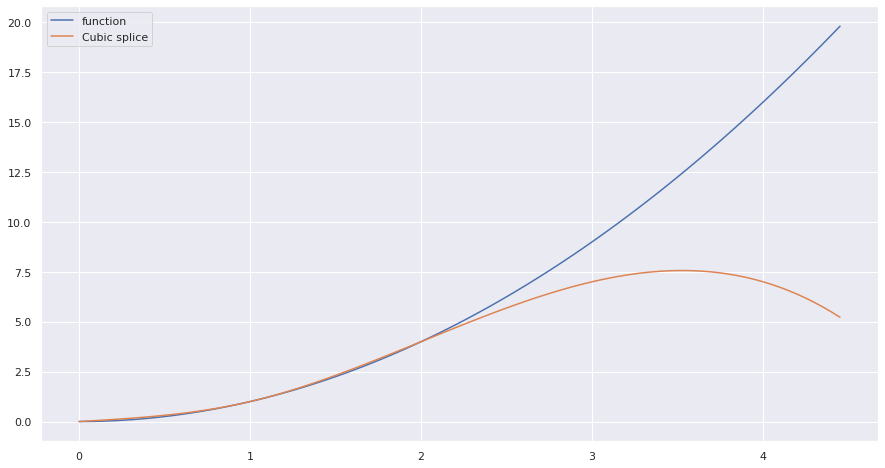

In [37]:
#NOTE only works for n >= 3
t = np.arange(0., 3, 1)
T = np.arange(0., 4.5, 0.05)

def f(t):
    return t**2
n = len(t)

# Cubic splines

# Get all b_k
f_vals = f(t)
def generate_h():
    temp = np.zeros([n-1,1])
    for i in range(n-1):
        temp[i] = t[i+1] - t[i]
    return temp
def generate_F():
    temp = np.zeros([n-2,1])
    for i in range(n-2):
        temp[i] = (f_vals[i+2] - f_vals[i+1])/H[i+1] - ((f_vals[i+1] - f_vals[i])/H[i])
    return 3* temp
def generate_b():
    temp = np.zeros([n-2,n-2])
    for i in range(n-3):
        temp[i][i] = 2 *(H[i] + H[i+1])
        temp[i + 1][i] = H[i+1]
        temp[i][i+1] = H[i+1]

    temp[-1][-1] = 2 * (H[-1] + H[-2] )
#     print(temp)
    matrix_inv = np.linalg.inv(temp)
    B = np.matmul(matrix_inv , F)

    return np.append(np.append([0], B), [0])
def generate_a():
    temp = np.zeros([n-1, 1])
    for i in range(n-1):
        temp[i] = 1/(3 *H[i]) *  (B[i+1] - B[i])
    return temp
def generate_c():
    temp = np.zeros([n-1, 1])
    for i in range(n-1):
        temp[i] = ((f_vals[i+1] - f_vals[i])/H[i]) - H[i] * ((B[i+1] + 2 * B[i])/3)
    return temp
def generate_S():
    S = list()
    for i in range(n-1):
        S.append( float(A[i]) * (x - t[i]) **3 + float(B[i])* (x - t[i])**2 + float(C[i])*(x - t[i]) + float(f_vals[i])) 
    return S

H = generate_h()
F = generate_F()
B = generate_b()
A = generate_a()
C = generate_c()

x = sym.symbols('x')
S = generate_S()
print(S)
print(n)
# print(S[0].subs(x, 1))
def interp(inputs):
    temp = np.zeros_like(inputs)
    for enum, item in enumerate(inputs):
        index = (np.abs(t-item)).argmin()
        if t[index] > item:
            index -= 1
        if index > n -2:
            index = n -2
        poly = S[index]
#         print(index)
        temp[enum] = poly.subs(x, item)
    return temp

plt.figure(figsize=(15,8))
plt.plot(T, f(T), label="function")
plt.plot(T, interp(T), label="Cubic splice")
plt.legend()

# Exercises

In [11]:
0.58778525 * (3/8) + 0.61566148 * 3/4 + 0.64278761 * (-1)/8

0.6018171275

IndexError: index 0 is out of bounds for axis 0 with size 0

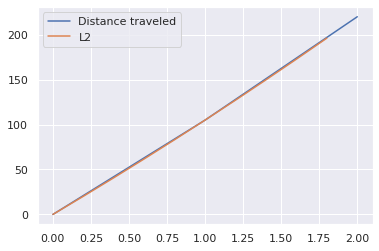

In [21]:
# Ex 3
t = np.arange(0., 2, 0.2)

def f(x):
    return 5*x**2 + 100*x
plt.plot([0,1,2],[0,105,220], label='Distance traveled')
plt.plot(t, f(t), label='L2')
plt.legend()